In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
from google.colab import files

In [ ]:
from scipy.io import wavfile

fs, y = wavfile.read('elefante.wav')
N = y.size

ipd.Audio(y,rate=fs)

Frequência de amostragem em Hz

In [ ]:
fs

22050

In [ ]:
2*fs

44100

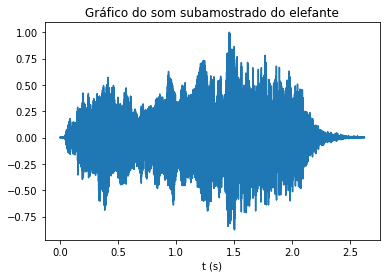

In [ ]:
t = np.arange(y.size)/fs
plt.plot(t,y);
plt.title('Gráfico do som subamostrado do elefante')
plt.xlabel('t (s)');

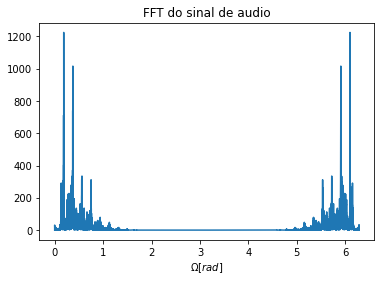

In [ ]:
#modulo da transf. de Fourier
S = np.fft.fft(y)
#frequencias avaliadas
w = np.linspace(0,2*math.pi,S.size)
plt.plot(w, abs(S));
plt.xlabel(r'$\Omega [rad]$');
plt.title('FFT do sinal de audio');

plt.savefig('fft_original.png', dpi=200)
#files.download("fft_original.png") 

*italicized text*

Pico esquerdo do espectro



(0.0, 0.4)

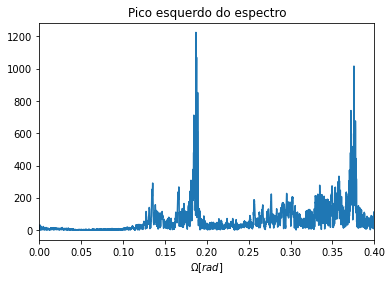

In [ ]:
plt.plot(w,abs(S))
plt.xlabel(r'$\Omega [rad]$');
plt.title('Pico esquerdo do espectro');
plt.xlim((0,0.4))



```
# This is formatted as code
```

Pico direito do espectro


(5.6, 6.0)

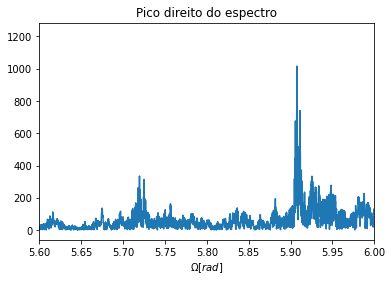

In [ ]:
plt.plot(w,abs(S))
plt.xlabel(r'$\Omega [rad]$');
plt.title('Pico direito do espectro');
plt.xlim((5.6,6))

In [ ]:
#subamostragem
x = y[::7]
fs_nova = int(fs/7)

ipd.Audio(x,rate=int(fs_nova))

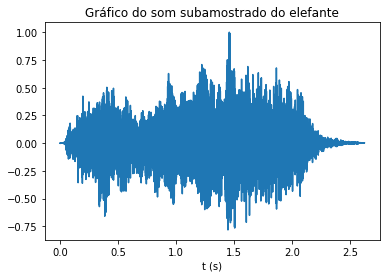

In [ ]:
t = np.arange(x.size)/fs_nova
plt.plot(t,x);
plt.title('Gráfico do som subamostrado do elefante')
plt.xlabel('t (s)');

In [ ]:
fs_nova

3150

In [ ]:
# maxima frequencia que não sofre aliasing
fs_nova/2

1575.0

In [ ]:
Kinicial = int(np.floor(N/(7*2)))
Kinicial

4136

In [ ]:
Kfinal = N - Kinicial+2
Kfinal

53776

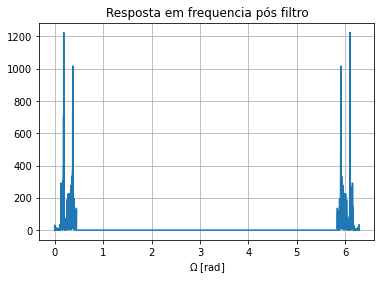

In [ ]:
 S[Kinicial:Kfinal] = 0
 plt.plot(w,abs(S))
 plt.xlabel('$\Omega$ [rad]')
 plt.grid(True)
 plt.title('Resposta em frequencia pós filtro')
 plt.show();

Transformada inversa do sinal filtrado

In [ ]:
z = np.fft.ifft(S)
z

array([0.00223651+4.09762460e-05j, 0.00155316+2.06727265e-04j,
       0.00096093+3.31561214e-04j, ..., 0.00392515-3.72496692e-04j,
       0.00351519-2.80444811e-04j, 0.00292254-1.32885110e-04j])

Média das componentes imaginárias do sinal

In [ ]:
np.format_float_scientific(z.imag.mean())

'3.3028568823494695e-19'

In [ ]:
z = np.real(z)

Text(0.5, 1.0, 'Gráfico do som do elefante sem frequencias que sofrem alising')

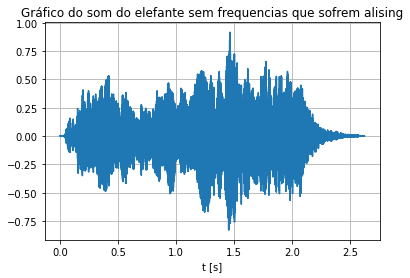

In [ ]:
t = np.arange(N)/fs
plt.plot(t,z)
plt.xlabel('t [s]')
plt.grid(True)
plt.title('Gráfico do som do elefante sem frequencias que sofrem alising')

In [ ]:
ipd.Audio(z,rate=fs)

In [ ]:
ipd.Audio(z[::7],rate=fs_nova)

In [ ]:
ipd.Audio(x,rate=fs_nova)

In [ ]:
ipd.Audio(y,rate=fs)